In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import cm

We will create an m x n matrix to represent our data.

In [2]:
m = 1500 # number of points, default 2000
n = 3 # representation dimension

We create our helix dataset with color gradient

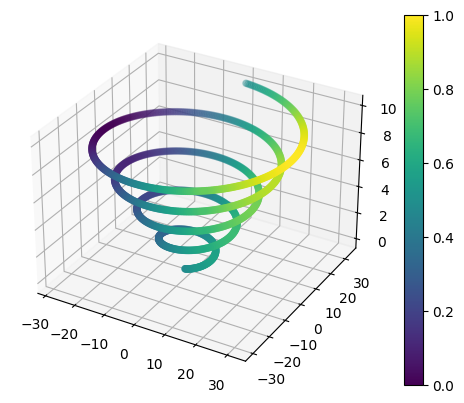

In [12]:
theta = np.linspace(1.5 * np.pi, 10.5 * np.pi, m) # 1.5 to 4.5 default
r = np.linspace(0, 10, m)
x = theta * np.cos(theta)
z = r
y = theta * np.sin(theta)
# fig = plt.figure()
gradient_colors = x

# Normalize the gradient_colors to be between 0 and 1
min_color = np.min(gradient_colors)
max_color = np.max(gradient_colors)
normalized_colors = (gradient_colors - min_color) / (max_color - min_color)

# Create a colormap
colormap = cm.viridis

# Create an interpolated color gradient based on the normalized_colors
interpolated_colors = colormap(normalized_colors)

# Plot the original data points in 3D with the interpolated color gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=interpolated_colors)
fig.colorbar(sc)
plt.show()

In [13]:
X = np.vstack((x, y, z)).T
X.shape

(1500, 3)

Our laplacian eigenmaps functions, namely laplacian_eigenmaps, 
avg_laplacian_eigenmaps, and var_radius_laplacian_eigenmaps are loaded
from a separate file

In [57]:
%run /Users/lucastucker/REU-2023/laplacian_eigenmaps_functions.ipynb

HERE
distances is an (1500, 11) matrix as [[0.         0.09128165 0.18290166 ... 0.73923121 0.83297061 0.92697656]
 [0.         0.09128165 0.09162881 ... 0.6481974  0.7420079  0.83609394]
 [0.         0.09162881 0.09197603 ... 0.5567549  0.65062773 0.74478509]
 ...
 [0.         0.62162324 0.62197883 ... 3.72247015 4.34079965 4.95838758]
 [0.         0.62197883 0.62233442 ... 4.34328701 4.96122964 5.57837566]
 [0.         0.62233442 1.24425782 ... 4.96407171 5.58157218 6.19822104]]


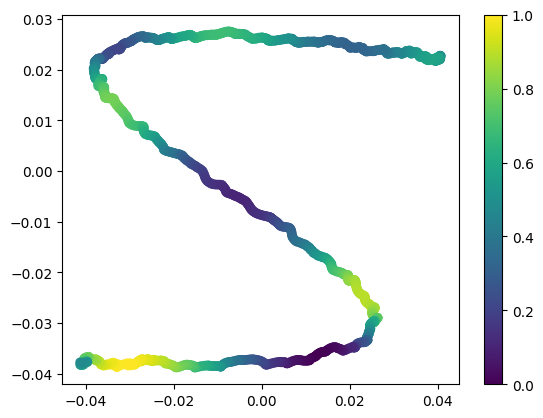

In [27]:
# Example usage
k = 2
sigma = 2
t = 10

P = laplacian_eigenmaps(X, k, t, sigma=sigma)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()

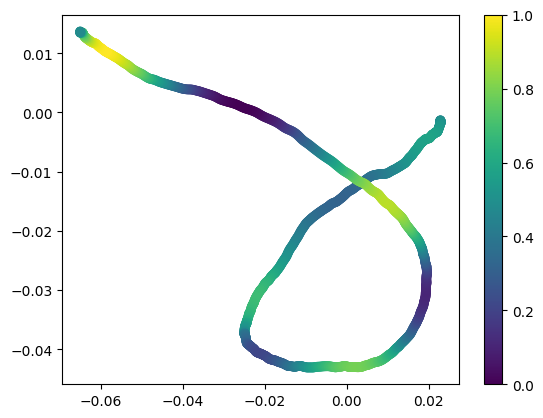

In [48]:
# Example usage
k = 2
sigma = 2
t = 10

P = avg_laplacian_eigenmaps(X, k, t, sigma=sigma)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()

We wish to compare the "Averaged Laplacian Eigenmap" algorithm to the standard
algorithm used by embedding a helix in 2D space. 

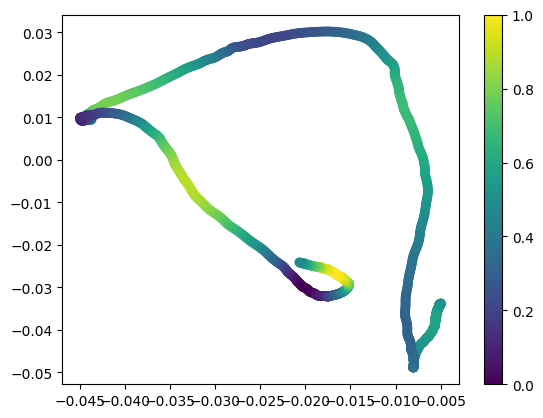

In [60]:
# Example usage
k = 2
sigma = 2
t = 18

P = var_radius_laplacian_eigenmaps(X, k, t)

# Plot the reduced data points in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(P.T[0, :], P.T[1, :], c=interpolated_colors) #, cmap=colormap, marker='o')
fig.colorbar(sc)

plt.show()

In [166]:
print(f"P has shape {P.shape}")

P has shape (1500, 2)
